In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset to the python environment

In [2]:
data=pd.read_excel('Downloads/iris (2).xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

# 2. Do necessary pre-processing steps

Handling missing values

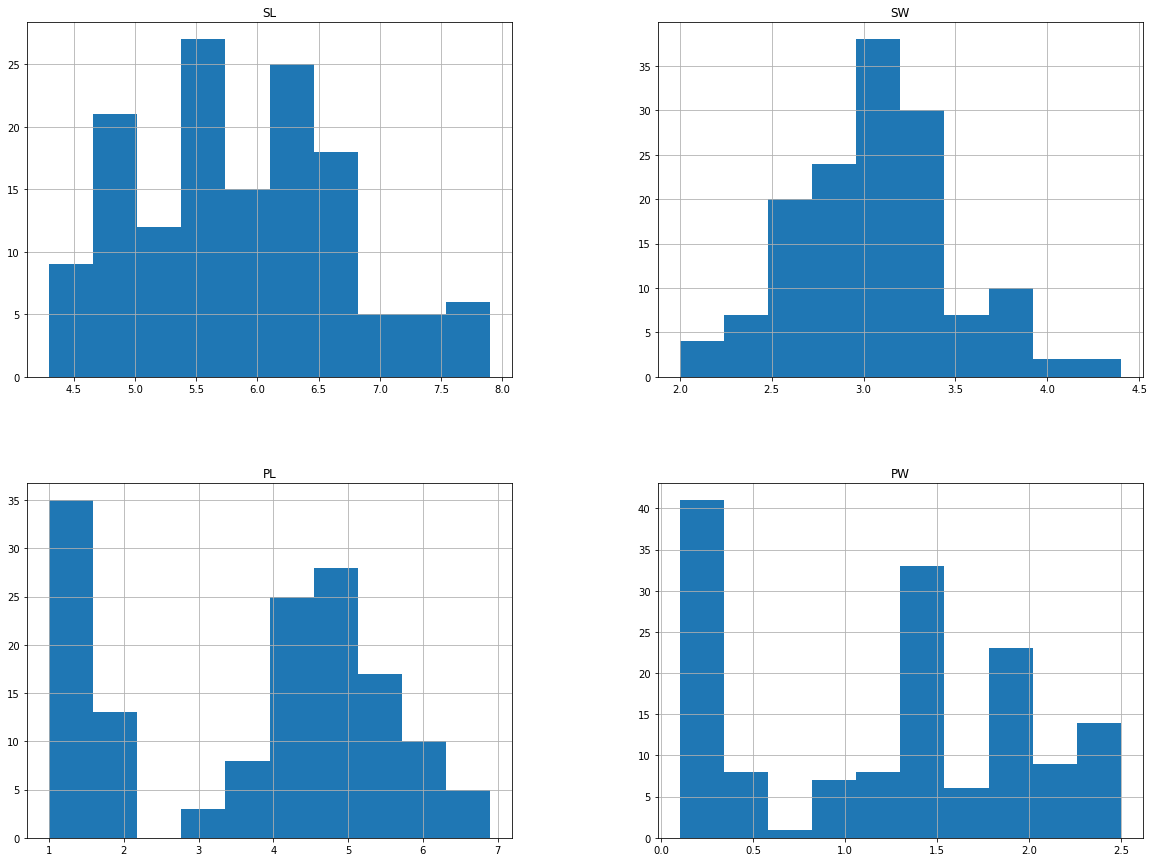

In [8]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [9]:
for i in ['SL','SW','PL']:
    data[i]=data[i].fillna(data[i].median())
    

In [10]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Handling outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1ef8c6670>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1ef8c6bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1ef8c6310>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1ef8d72b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1ef8d7610>],
 'means': []}

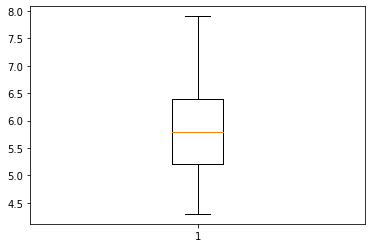

In [11]:
plt.boxplot(data['SL'])


In [12]:
Q1=np.percentile(data['SL'],25,interpolation='midpoint')
Q2 = np.percentile(data['SL'],50,interpolation='midpoint')
Q3 = np.percentile(data['SL'],75,interpolation='midpoint')
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)

Q1= 5.2
Q2= 5.8
Q3= 6.4


In [13]:
print('Median=',data['SL'].median())

Median= 5.8


In [14]:
IQR=Q3-Q1
low_limit = Q1 - 1.5*IQR
upp_limit = Q3 + 1.5*IQR

In [15]:
print('IQR = Q3 - Q1 =',IQR)
print('Lower limit is :',low_limit)
print('Upper limit is :',upp_limit)

IQR = Q3 - Q1 = 1.2000000000000002
Lower limit is : 3.4
Upper limit is : 8.200000000000001


In [16]:
outliers=[]
for x in data['SL']:
    if ((x>upp_limit) or (x<low_limit)):
        outliers.append(x)
print('outliers  :\n',outliers) 

outliers  :
 []


There is no outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1ef9364f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1ef936bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1ef9361f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1ef93f2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1ef93f610>],
 'means': []}

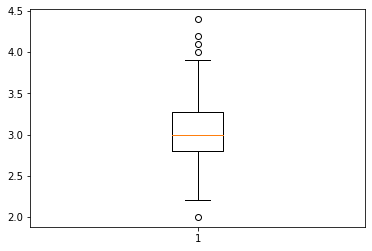

In [17]:
plt.boxplot(data['SW'])

In [18]:
Q1 = np.percentile(data['SW'],25,interpolation='midpoint')
Q2 = np.percentile(data['SW'],50,interpolation='midpoint')
Q3 = np.percentile(data['SW'],75,interpolation='midpoint')
IQR = Q3 - Q1
low_limit = Q1 - 1.5*IQR
upp_limit = Q3 + 1.5*IQR
print('Q1 is:',Q1)
print('Q2 is:',Q2)
print('Q3 is:',Q3)
print('IQR = Q3 - Q1 =',IQR)
print('Lower limit is :',low_limit)
print('Upper limit is :',upp_limit)


Outliers=[]
for x in data['SW']:
    if ((x>upp_limit) or (x<low_limit)):
        Outliers.append(x)
print('Outliers :\n',Outliers)

Q1 is: 2.8
Q2 is: 3.0
Q3 is: 3.25
IQR = Q3 - Q1 = 0.4500000000000002
Lower limit is : 2.1249999999999996
Upper limit is : 3.9250000000000003
Outliers :
 [4.0, 4.4, 4.1, 4.2, 2.0]


In [19]:
ind1 = data['SW']>upp_limit
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [20]:
ind2 = data['SW']<low_limit
data.loc[ind2].index

Int64Index([60], dtype='int64')

In [21]:
data.drop(data.loc[ind1].index,inplace=True)
data.drop(data.loc[ind2].index,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1ef9d6c70>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1ef9e2310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1ef9d6910>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1ef9e29d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1ef9e2d30>],
 'means': []}

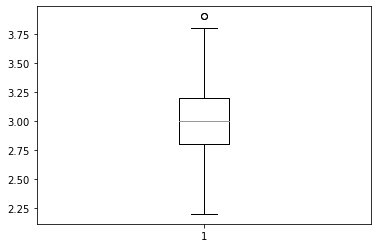

In [22]:
plt.boxplot(data['SW'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1efa397c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1efa39d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1efa394c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1efa46400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1efa46760>],
 'means': []}

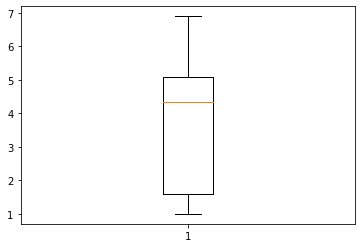

In [23]:
plt.boxplot(data['PL'])

In [24]:
Q1 = np.percentile(data['PL'],25,interpolation='midpoint')
Q2 = np.percentile(data['PL'],50,interpolation='midpoint')
Q3 = np.percentile(data['PL'],75,interpolation='midpoint')
IQR = Q3 - Q1
low_limit = Q1 - 1.5*IQR
upp_limit = Q3 + 1.5*IQR
print('Q1 is:',Q1)
print('Q2 is:',Q2)
print('Q3 is:',Q3)
print('IQR = Q3 - Q1 =',IQR)
print('Lower limit is :',low_limit)
print('Upper limit is :',upp_limit)


Outliers=[]
for x in data['PL']:
    if ((x>upp_limit) or (x<low_limit)):
        Outliers.append(x)
print('Outliers :\n',Outliers)

Q1 is: 1.6
Q2 is: 4.35
Q3 is: 5.1
IQR = Q3 - Q1 = 3.4999999999999996
Lower limit is : -3.649999999999999
Upper limit is : 10.349999999999998
Outliers :
 []


There is no outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1efaa2160>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1efaa2820>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1efa94e20>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1efaa2ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1efaac280>],
 'means': []}

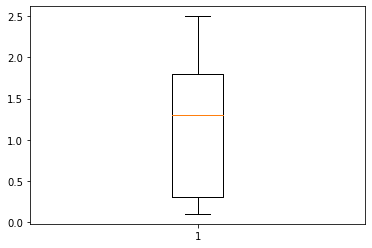

In [25]:
plt.boxplot(data['PW'])

In [26]:
Q1 = np.percentile(data['PW'],25,interpolation='midpoint')
Q2 = np.percentile(data['PW'],50,interpolation='midpoint')
Q3 = np.percentile(data['PW'],75,interpolation='midpoint')
IQR = Q3 - Q1
low_limit = Q1 - 1.5*IQR
upp_limit = Q3 + 1.5*IQR
print('Q1 is:',Q1)
print('Q2 is:',Q2)
print('Q3 is:',Q3)
print('IQR = Q3 - Q1 =',IQR)
print('Lower limit is :',low_limit)
print('Upper limit is :',upp_limit)


Outliers=[]
for x in data['PW']:
    if ((x>upp_limit) or (x<low_limit)):
        Outliers.append(x)
print('Outliers :\n',Outliers)

Q1 is: 0.3
Q2 is: 1.3
Q3 is: 1.8
IQR = Q3 - Q1 = 1.5
Lower limit is : -1.95
Upper limit is : 4.05
Outliers :
 []


There is no outliers

Normalisation

In [27]:
y=data['Classification']
x=data.drop(['Classification'],axis=1)

In [28]:
x.describe()

,SL,SW,PL,PW
count,145.000000,145.000000,145.000000,145.000000
mean,5.867586,3.023448,3.847586,1.226897
std,0.816827,0.374354,1.712265,0.758219
min,4.300000,2.200000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


In [29]:
from sklearn import preprocessing
x=preprocessing.normalize(x)
x=pd.DataFrame(x)
x.describe()

,0,1,2,3
count,145.000000,145.000000,145.000000,145.000000
mean,0.750558,0.397703,0.465043,0.144106
std,0.048136,0.097243,0.154637,0.077887
min,0.631396,0.238392,0.168646,0.016695
25%,0.713666,0.325894,0.262330,0.051382
50%,0.747142,0.354212,0.539660,0.164742
75%,0.788928,0.507020,0.582878,0.197997
max,0.860939,0.607125,0.636981,0.280419


# 3. Find out which classification model gives the best result to predict iris species.

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# Logistic regression model

In [31]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[ 9  0  0]
 [ 0  4  5]
 [ 0  0 11]]

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.44      0.62         9
 Iris-virginica       0.69      1.00      0.81        11

       accuracy                           0.83        29
      macro avg       0.90      0.81      0.81        29
   weighted avg       0.88      0.83      0.81        29



# KNN model

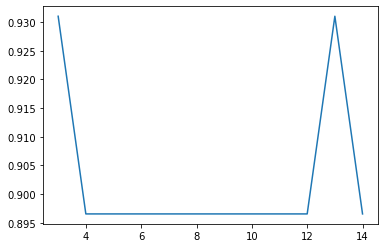

In [33]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
for k in np.arange(3,15):
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_pred,y_test)
    acc_values.append(acc)
plt.plot(np.arange(3,15),acc_values)
plt.show()

k value = 13 

In [34]:
classifier=KNeighborsClassifier(n_neighbors=13,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [35]:
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        29
      macro avg       0.93      0.93      0.93        29
   weighted avg       0.93      0.93      0.93        29



# Support Vector Machine

In [36]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='rbf')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [37]:
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[ 9  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        29
      macro avg       0.97      0.96      0.97        29
   weighted avg       0.97      0.97      0.97        29



# Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[ 9  0  0]
 [ 0  7  2]
 [ 0  0 11]]

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.78      0.88         9
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        29
      macro avg       0.95      0.93      0.93        29
   weighted avg       0.94      0.93      0.93        29



# Random Forest Model

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[ 9  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        29
      macro avg       0.97      0.96      0.97        29
   weighted avg       0.97      0.97      0.97        29



In [40]:
#Evaluating the feature importance
pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100

3    36.914220
2    33.766188
1    20.923550
0     8.396042
dtype: float64

The feature 'SL' has the least importance in the model.

# Extreme gradient boosting

In [41]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)


ModuleNotFoundError: No module named 'xgboost'

Out of the six models, Support Vector Machine, Random Forest and Extreme Gradient Boosting gives the highest accuracy of 97%.
They are the best models.